<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r15-less-features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-15-m-1-r15.csv?token=AKVFSOGFDC75YKXKWNBM67C63JJVE')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-15-m-11-r15.csv?token=AKVFSOAFEHDGNJ6UICOJZQS63JJVK')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-4-m-1-r15.csv?token=AKVFSOBNA22AKZ5A7GS2KHC63JJVM')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-4-m-11-r15.csv?token=AKVFSOHBRFY5B2I4JOQNCKK63JJVS')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-6-m-1-r15.csv?token=AKVFSOAO6OGH5SOSF4HPWXK63JJVW')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-6-m-11-r15.csv?token=AKVFSOHAYSAW7BRAVDOG6TS63JJV4')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-9-m-1-r15.csv?token=AKVFSOHEWRSRFLKWFEVUENC63JJV6')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-9-m-11-r15.csv?token=AKVFSOCWPRWAMASKNUZN2UK63JJWC')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-normal-n-0-15-r15.csv?token=AKVFSOCRVU5HHXZ5Z37GBOK63JJWI')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-normal-n-0-4-r15.csv?token=AKVFSOC5RYQJMU2AIZ6UGJC63JJWM')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-normal-n-0-6-r15.csv?token=AKVFSODRSWN6WZDROVLWPPK63JJWQ')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-normal-n-0-9-r15.csv?token=AKVFSOFSNSJUT6DCGV5BNT263JJWY')

In [4]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(88036, 26)
(88873, 26)
(28382, 26)
(29188, 26)
(28382, 26)
(29188, 26)
(28382, 26)
(29188, 26)
(78463, 26)
(18792, 26)
(18792, 26)
(18792, 26)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r12-train.csv',index=False)

In [6]:
df = pd.read_csv('fft-r12-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,3,0,1,1,4,3,9,15,15,23,7,3,2,0,0.0,4,63,1,63,63,0,12,3,27,0
1,7,3,0,1,1,4,3,9,15,15,23,7,3,2,0,0.0,4,60,1,60,60,0,12,3,27,0
2,7,3,0,1,1,4,3,9,15,15,23,7,2,2,0,0.0,4,62,1,62,62,0,8,3,27,1
3,62,0,3,4,1,1,5,17,23,7,15,15,3,2,2,1.0,12,62,2,63,124,0,12,20,340,0
4,62,0,3,4,1,1,5,17,23,7,15,15,2,2,2,1.0,12,61,2,62,122,0,8,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484453,3276881,3,0,5,3,2,3,9,15,15,27,11,30095,1,0,0.0,18,5,56,60,280,0,902850,15,135,0
484454,3276888,3,0,5,4,2,3,9,15,15,27,11,30095,1,0,0.0,25,4,57,60,228,0,1203800,15,135,0
484455,3276895,3,0,5,5,3,3,9,15,15,27,11,30095,1,0,0.0,32,3,58,60,174,0,2257125,15,135,0
484456,3276896,3,0,1,1,4,3,10,15,15,27,11,30096,1,0,0.0,32,2,59,60,118,0,120384,3,30,0


In [7]:
df.shape

(484458, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-15-m-12-r15.csv?token=AKVFSOFCIIATN53BXPZZYAS63JK5C')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-15-m-7-r15.csv?token=AKVFSOGNEHOF57IWO2H7FXC63JK5G')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-4-m-12-r15.csv?token=AKVFSOCPIIFOLQNDQMMWWZK63JK5I')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-4-m-7-r15.csv?token=AKVFSOCB4H2XK6OOQSGGKMK63JK5M')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-6-m-12-r15.csv?token=AKVFSOF6O7SLN7ZGKZCOWK263JK5S')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-6-m-7-r15.csv?token=AKVFSOBBCKN5ZT36DWFVJ5263JK5W')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-9-m-12-r15.csv?token=AKVFSODMBWR2W3K6FF2UXBK63JK52')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-9-m-7-r15.csv?token=AKVFSOFKHHH63FKPM45JO6S63JK6A')

In [9]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(94994, 26)
(88862, 26)
(35144, 26)
(29188, 26)
(35150, 26)
(29220, 26)
(35150, 26)
(29188, 26)


In [10]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,749,3,4,2,1,4,3,9,30,14,27,11,25,2,1,0.50,8,3,1,3,3,12,200,6,54,0
1,804,3,4,2,1,4,3,9,30,14,27,11,26,2,1,0.50,8,2,2,3,4,12,208,6,54,0
2,861,3,4,2,1,4,3,9,30,14,27,11,28,2,1,0.50,8,1,3,3,3,12,224,6,54,0
3,1149,3,4,2,1,4,3,9,28,12,27,11,36,4,3,0.75,16,9,1,9,9,12,288,6,54,0
4,1222,3,4,2,1,4,3,9,28,12,27,11,38,4,3,0.75,16,8,2,9,16,12,304,6,54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,3265385,3,4,6,2,2,3,9,30,14,27,11,30079,2,1,0.50,15,5,8,12,40,12,721896,18,162,0
28378,3265392,3,4,6,3,2,3,9,30,14,27,11,30079,2,1,0.50,22,4,9,12,36,12,1082844,18,162,0
28379,3265399,3,4,6,4,2,3,9,30,14,27,11,30079,2,1,0.50,29,3,10,12,30,12,1443792,18,162,0
28380,3265406,3,4,6,5,3,3,9,30,14,27,11,30079,2,1,0.50,36,2,11,12,22,12,2707110,18,162,0


Processing

In [11]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [13]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.343915,0.202192,0.000340,-0.000515,-0.598961,-0.502748,0.031492,-0.126783,-0.648465,-0.779369,-0.090393,-0.072919,-0.066346,-0.100374,-0.074300,0.397801,0.089181,-0.172143,-0.450036,-0.016598
inport,-0.343915,1.000000,0.063523,0.013245,-0.020038,0.171362,-0.004060,0.028151,0.216434,0.596556,0.811097,0.287796,-0.114039,-0.162147,-0.199058,-0.149719,0.694000,0.036343,0.164813,0.114162,-0.038480
cache_coherence_type,0.202192,0.063523,1.000000,0.297439,-0.449990,-0.239144,-0.297482,0.049307,-0.041914,-0.073211,-0.102832,-0.298739,-0.039741,-0.089881,-0.093424,-0.068994,0.231668,0.322141,0.806557,0.278693,-0.025666
flit_id,0.000340,0.013245,0.297439,1.000000,-0.022075,0.124264,0.079372,0.007002,0.011386,0.035158,0.007855,0.425463,-0.000906,0.022709,0.015714,0.015180,0.018342,0.671647,0.358862,0.265321,0.008433
flit_type,-0.000515,-0.020038,-0.449990,-0.022075,1.000000,-0.187996,-0.120080,-0.010593,-0.017225,-0.053190,-0.011884,0.423471,-0.080559,0.048238,-0.023295,-0.019041,-0.027748,0.116880,-0.542915,-0.401399,-0.012759
vnet,-0.598961,0.171362,-0.239144,0.124264,-0.187996,1.000000,0.950651,-0.057308,0.067599,0.328846,0.486038,-0.152307,0.135080,0.172072,0.221376,0.165569,-0.315592,-0.078897,0.381120,0.852424,0.054379
vc,-0.502748,-0.004060,-0.297482,0.079372,-0.120080,0.950651,1.000000,-0.061920,0.009607,0.199353,0.318259,-0.178792,0.145872,0.202925,0.251391,0.189093,-0.408510,-0.107310,0.295529,0.821111,0.055538
traversal_id,0.031492,0.028151,0.049307,0.007002,-0.010593,-0.057308,-0.061920,1.000000,-0.011939,0.001212,0.004128,0.038243,0.095512,0.096374,0.138300,0.107122,0.055866,0.532729,0.012057,-0.034086,-0.286071
hop_count,-0.126783,0.216434,-0.041914,0.011386,-0.017225,0.067599,0.009607,-0.011939,1.000000,0.685728,0.336249,0.386522,-0.006709,-0.063482,-0.050589,-0.052610,0.008189,-0.020426,0.001247,0.012464,0.032270
current_hop,-0.648465,0.596556,-0.073211,0.035158,-0.053190,0.328846,0.199353,0.001212,0.685728,1.000000,0.807232,0.472224,-0.026361,-0.090878,-0.084499,-0.071703,0.057335,-0.016611,0.130501,0.224813,0.008387


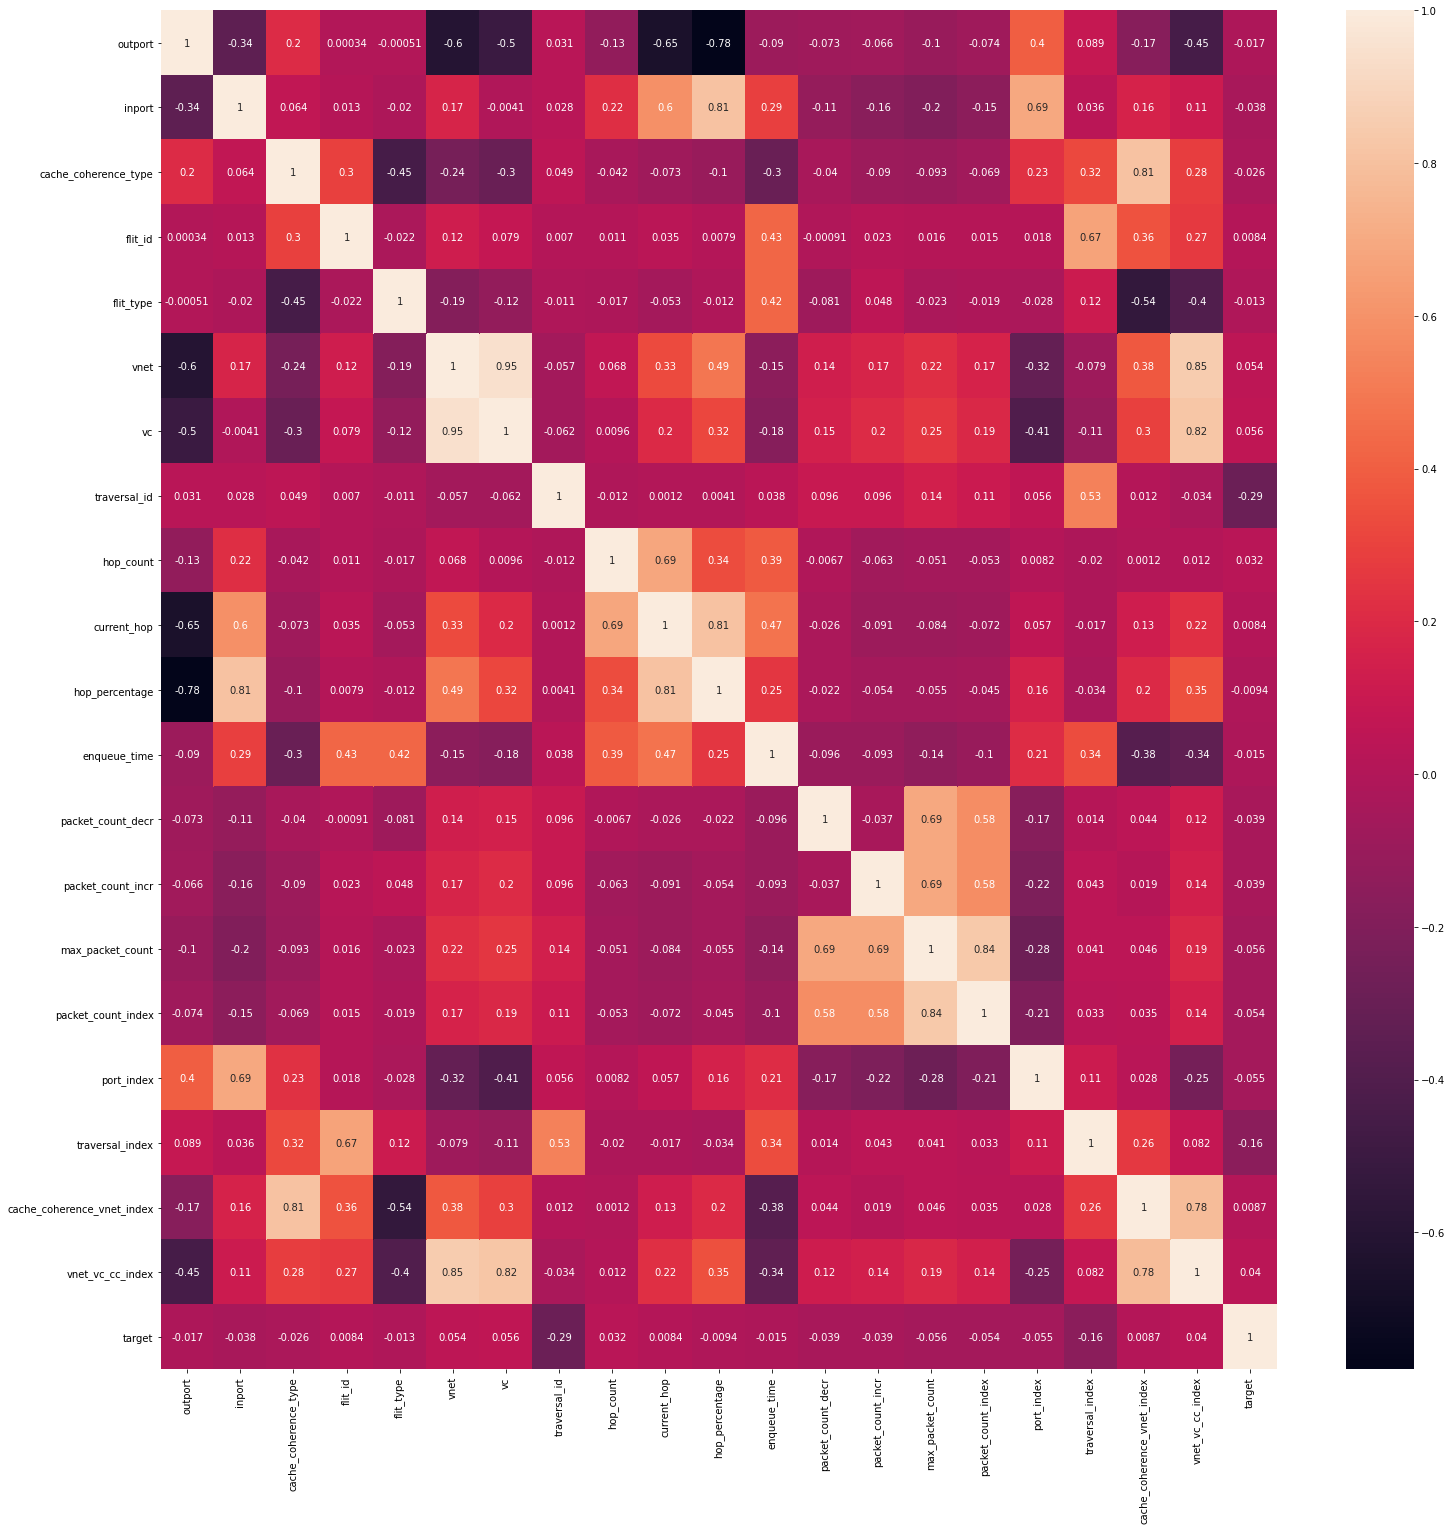

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [16]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

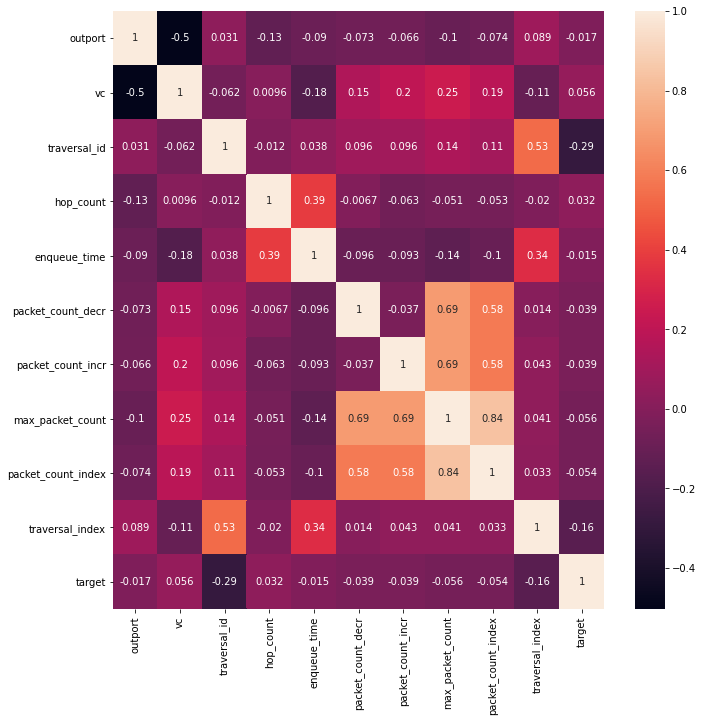

In [18]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

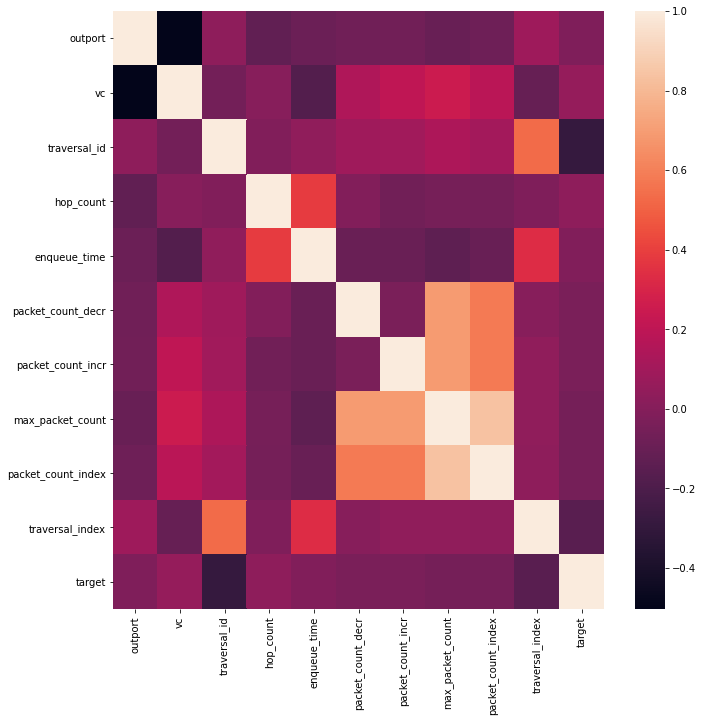

In [19]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [21]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.75,0.000,0.000033,0.333333,0.000000,0.405229,0.000000,0.405229,0.010325,0.000001
1,0.75,0.000,0.000033,0.333333,0.000000,0.385621,0.000000,0.385621,0.009825,0.000001
2,0.75,0.000,0.000000,0.333333,0.000000,0.398693,0.000000,0.398693,0.010158,0.000000
3,0.00,1.000,0.000033,0.333333,0.117647,0.398693,0.006536,0.405229,0.020483,0.000001
4,0.00,1.000,0.000000,0.333333,0.117647,0.392157,0.006536,0.398693,0.020150,0.000000
...,...,...,...,...,...,...,...,...,...,...
484453,0.75,0.000,0.999967,0.166667,0.205882,0.026144,0.359477,0.385621,0.046461,0.333442
484454,0.75,0.000,0.999967,0.166667,0.308824,0.019608,0.366013,0.385621,0.037802,0.444591
484455,0.75,0.000,0.999967,0.166667,0.411765,0.013072,0.372549,0.385621,0.028809,0.833610
484456,0.75,0.125,1.000000,0.166667,0.411765,0.006536,0.379085,0.385621,0.019484,0.044458


In [22]:
train_X[train_X.duplicated()].shape

(4455, 10)

In [23]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.75,0.0,0.000033,0.333333,0.000000,0.411392,0.000000,0.411392,0.010158,0.000001
1,0.75,0.0,0.000000,0.833333,0.179104,0.405063,0.006329,0.411392,0.020159,0.000000
2,0.00,1.0,0.000033,0.333333,0.119403,0.398734,0.012658,0.411392,0.029848,0.000001
3,0.00,1.0,0.000033,0.333333,0.134328,0.392405,0.018987,0.411392,0.039225,0.000015
4,0.00,1.0,0.000033,0.333333,0.149254,0.386076,0.025316,0.411392,0.048289,0.000024
...,...,...,...,...,...,...,...,...,...,...
94989,0.00,1.0,0.999967,0.333333,0.164179,0.025316,0.291139,0.316456,0.036568,0.355660
94990,0.00,1.0,0.999967,0.333333,0.223881,0.018987,0.297468,0.316456,0.029848,0.666865
94991,0.75,0.0,1.000000,0.166667,0.000000,0.012658,0.303797,0.316456,0.022816,0.055571
94992,0.75,0.0,1.000000,0.166667,0.104478,0.006329,0.310127,0.316456,0.015471,0.222294


In [24]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [25]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [26]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [27]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


In [28]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 10)


In [29]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 10)


In [30]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [32]:
train_Y = df['target']
train_Y.value_counts()

0    349619
1    134839
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  5075.526899
9     traversal_index  1863.504212
1                  vc   669.218004
8  packet_count_index   177.704138
7    max_packet_count   164.498233
6   packet_count_incr    83.700013
5   packet_count_decr    80.810432
3           hop_count    53.455620
0             outport    28.257010
4        enqueue_time    10.310229


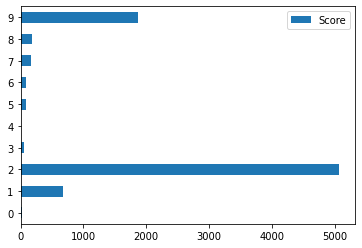

In [35]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r14.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [40]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 94.45565400473726
Test Prediction Score 93.68678528671097


In [41]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 83.94003831820957
Test Prediction Score 88.37860952938263
Test Prediction Score 80.68518096972456
Test Prediction Score 83.85295326846649
Test Prediction Score 81.49359886201991
Test Prediction Score 83.39151266255989
Test Prediction Score 82.71977240398293
Test Prediction Score 82.86624640263122


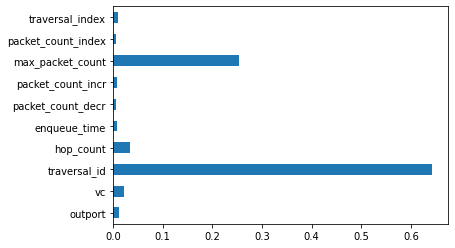

In [42]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

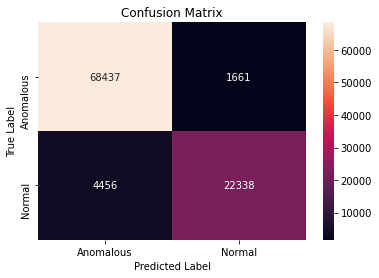

In [43]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [44]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     70098
           1       0.93      0.83      0.88     26794

    accuracy                           0.94     96892
   macro avg       0.93      0.90      0.92     96892
weighted avg       0.94      0.94      0.94     96892



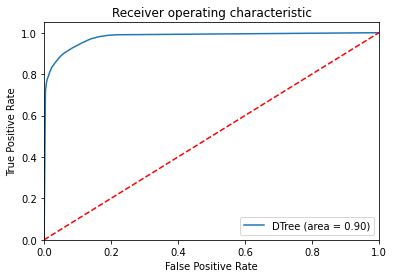

In [45]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [47]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r15l.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [50]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.93807506334404
Test Prediction Score 99.34256698179416


In [51]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 85.12116554729772
Test Prediction Score 89.588350476019
Test Prediction Score 85.42852264966993
Test Prediction Score 85.38097848430863
Test Prediction Score 84.47795163584637
Test Prediction Score 85.76659822039699
Test Prediction Score 85.17496443812233
Test Prediction Score 85.88803617925174


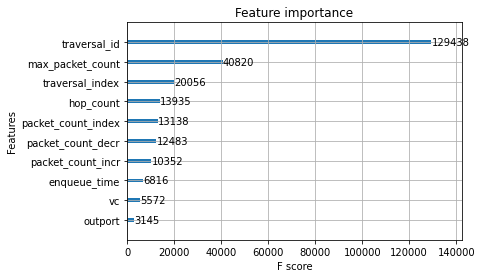

In [52]:
plot_importance(xgbc)
plt.show()

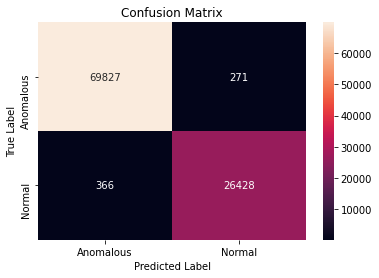

In [53]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [54]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     70098
           1       0.99      0.99      0.99     26794

    accuracy                           0.99     96892
   macro avg       0.99      0.99      0.99     96892
weighted avg       0.99      0.99      0.99     96892



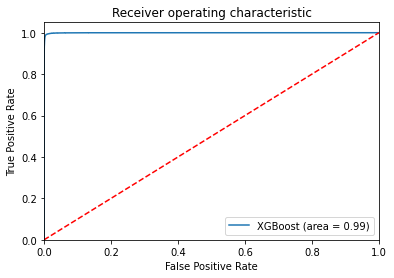

In [55]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()